In [113]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

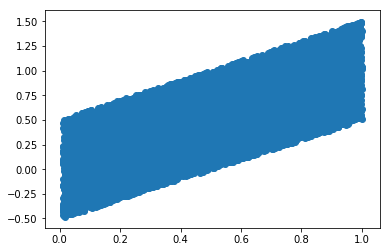

In [114]:
n = 10000
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 1, n)  + np.random.rand(n) - .5

plt.scatter(x,y)

# Assignment 5

## 1. Create and fit a Linear Regression Model
## Calculate the Training error and Testing error using sklearn with a .50 split 
For error, use `mean_squared`, but if you want to experiment with other mean errors, please do!

Fit: [1.00667905] -0.0008135204937923524


Text(0.5,1,'No Split')

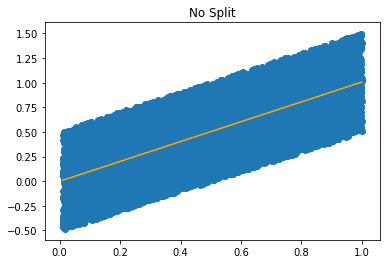

In [115]:
# First, display no split at all
from IPython.display import display

model = LinearRegression()
model.fit(x, y)
nosplit = model.coef_, model.intercept_
print("Fit:" , model.coef_, model.intercept_)

plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_, c="orange")
plt.title("No Split") 

slope N y intercept: [1.00667905] -0.0008135204937923524

MSE test set:  0.08193607038225537
MSE train set: 0.08238151071813508

Test set and train set error values go up and down variably such that one is higher over the other at one instance while others not


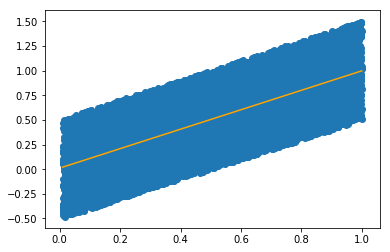

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print("slope N y intercept:", model.coef_, model.intercept_)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)
model = LinearRegression()
model.fit(x_train, y_train)

plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_, c="orange")
print("")
print("MSE test set: ", mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_))
print("MSE train set:", mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_))

print("")
print("Test set and train set error values go up and down variably such that one is higher over the other at one instance while others not")

In [117]:
print("Of course, the lengthy, thought-provoking methods:")

# Dissect halves mehtod
model = LinearRegression()
model.fit(x[:5000], y[:5000])
print("First half:", model.coef_, model.intercept_)

# Unsurprisingly, it looks about the same without the split
print("w/o split: ", nosplit)
# ...which means y is not negative 1 at x with nearly 1:1 slope"



# Shuffle method
print("")
print("")
def shuffle(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return p
p = shuffle(x, y)
print("Let's see it shuffled: ", p)
model = LinearRegression()
model.fit(x[p][:5000], y[p][:5000])
print("For first half:", model.coef_, model.intercept_)
print("training:      ", np.sum(np.square(y[p][:5000] - (np.dot(x[p][:5000], model.coef_) + model.intercept_)))/5000)
model.fit(x[p][5000:], y[p][5000:])
print("test:          ", np.sum(np.square(y[p][5000:] - (np.dot(x[p][5000:], model.coef_) + model.intercept_)))/5000)

Of course, the lengthy, thought-provoking methods:
First half: [1.07944414] -0.017001087156517547
w/o split:  (array([1.00667905]), -0.0008135204937923524)


Let's see it shuffled:  [ 733 9637 2606 ... 9820 8499 8060]
For first half: [1.00940316] -0.002470071618303149
training:       0.08182365972121665
test:           0.08242335720073943


In [118]:
# Cool. Everything looks about the same. Probably because of the
# dense data

## 2.  Repeat #1 for a Ridge Regression

In [119]:
from sklearn.linear_model import Ridge

linear_model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

print("training set:", mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_))
print("test set:    ", mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_))

training set: 0.08238151071813508
test set:     0.08193607038225537


In [120]:
# considering the dense data, this makes sense

## 3. Vary the `split` size from .01 to .99 with at least 10 values (the more the merrier!). Plot the resulting Training error and Testing error vs. `split` size. Create separate plots for Linear and Ridge

Train .01:  0.08222862469037331
Test .01:   0.07232178755753664


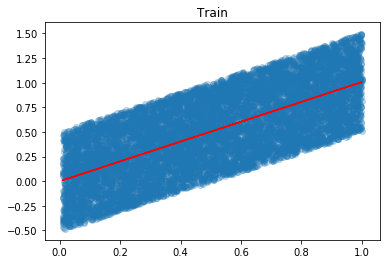

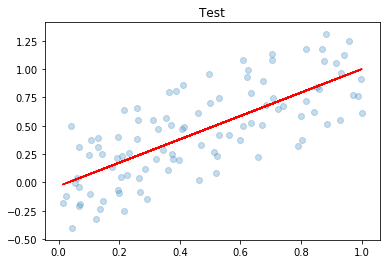

In [206]:
model = LinearRegression()
model.fit(x_train, y_train)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.01)
print("Train .01: ", mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_))
print("Test .01:  ", mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_))
model.fit(x_train, y_train)
model.coef_, model.intercept_
plt.scatter(x_train,y_train, alpha=.25)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c="red")
plt.title("Train")
plt.show()

model.fit(x_test, y_test)
model.coef_, model.intercept_
plt.scatter(x_test,y_test, alpha=.25)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c="red")
plt.title("Test")
plt.show()

Train .1:  0.081691155232183
Test .1:   0.08793467503872987


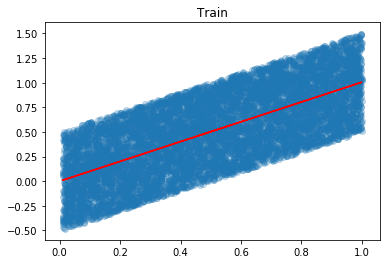

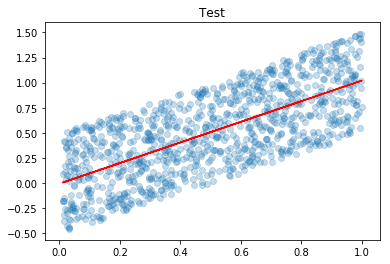

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1)
print("Train .1: ", mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_))
print("Test .1:  ", mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_))
model.fit(x_train, y_train)
model.coef_, model.intercept_
plt.scatter(x_train,y_train, alpha=.25)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c="red")
plt.title("Train")
plt.show()

model.fit(x_test, y_test)
model.coef_, model.intercept_
plt.scatter(x_test,y_test, alpha=.25)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c="red")
plt.title("Test")
plt.show()
print("")

Train .2:  0.08227277422357117
Test .2:   0.08350679428320888


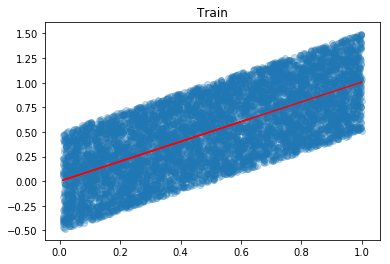

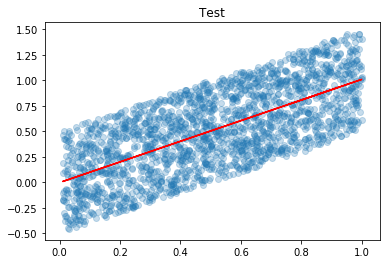

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)
print("Train .2: ", mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_))
print("Test .2:  ", mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_))
model.fit(x_train, y_train)
model.coef_, model.intercept_
plt.scatter(x_train,y_train, alpha=.25)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c="red")
plt.title("Train")
plt.show()

model.fit(x_test, y_test)
model.coef_, model.intercept_
plt.scatter(x_test,y_test, alpha=.25)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c="red")
plt.title("Test")
plt.show()

Train .3:  0.08217690112888862
Test .3:   0.0820048050391842


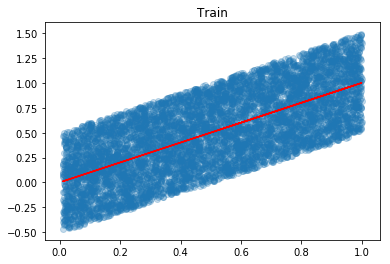

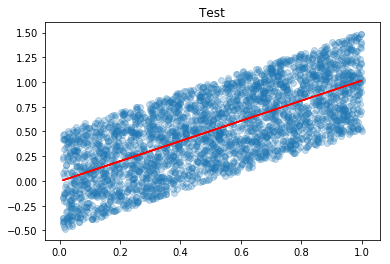

In [185]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)
print("Train .3: ", mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_))
print("Test .3:  ", mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_))
model.fit(x_train, y_train)
model.coef_, model.intercept_
plt.scatter(x_train,y_train, alpha=.25)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c="red")
plt.title("Train")
plt.show()

model.fit(x_test, y_test)
model.coef_, model.intercept_
plt.scatter(x_test,y_test, alpha=.25)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c="red")
plt.title("Test")
plt.show()

Train .4:  0.08196757648070839
Test .4:   0.08241143928093737


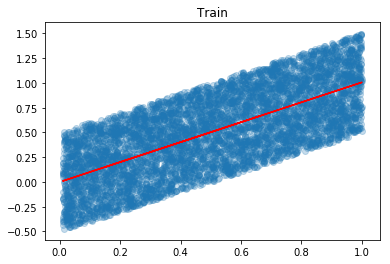

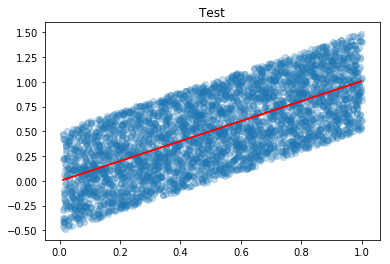

In [186]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.4)
print("Train .4: ", mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_))
print("Test .4:  ", mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_))
model.fit(x_train, y_train)
model.coef_, model.intercept_
plt.scatter(x_train,y_train, alpha=.25)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c="red")
plt.title("Train")
plt.show()

model.fit(x_test, y_test)
model.coef_, model.intercept_
plt.scatter(x_test,y_test, alpha=.25)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c="red")
plt.title("Test")
plt.show()

Train .5:  0.08235632246356045
Test .5:   0.08189232034088667


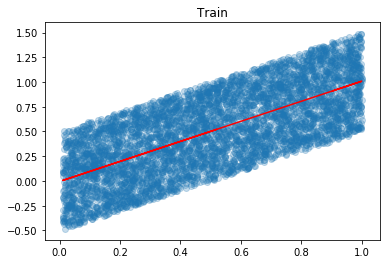

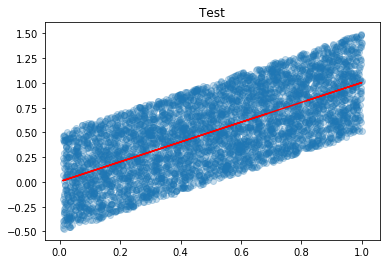

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)
print("Train .5: ", mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_))
print("Test .5:  ", mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_))
model.fit(x_train, y_train)
model.coef_, model.intercept_
plt.scatter(x_train,y_train, alpha=.25)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c="red")
plt.title("Train")
plt.show()

model.fit(x_test, y_test)
model.coef_, model.intercept_
plt.scatter(x_test,y_test, alpha=.25)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c="red")
plt.title("Test")
plt.show()

Train .6:  0.08265570736864483
Test .6:   0.081777314956556


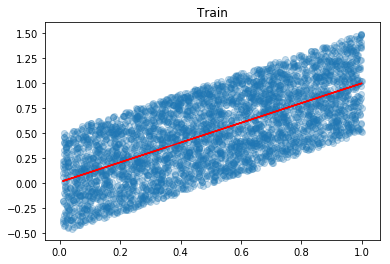

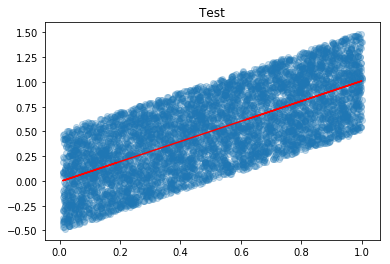

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.6)
print("Train .6: ", mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_))
print("Test .6:  ", mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_))
model.fit(x_train, y_train)
model.coef_, model.intercept_
plt.scatter(x_train,y_train, alpha=.25)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c="red")
plt.title("Train")
plt.show()

model.fit(x_test, y_test)
model.coef_, model.intercept_
plt.scatter(x_test,y_test, alpha=.25)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c="red")
plt.title("Test")
plt.show()

Train .7:  0.08387569652894002
Test .7:   0.08139164616623955


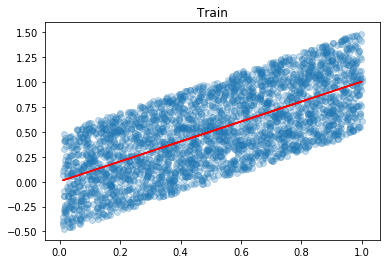

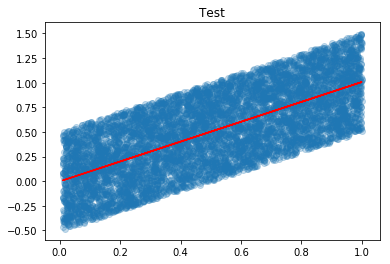

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.7)
print("Train .7: ", mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_))
print("Test .7:  ", mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_))
model.fit(x_train, y_train)
model.coef_, model.intercept_
plt.scatter(x_train,y_train, alpha=.25)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c="red")
plt.title("Train")
plt.show()

model.fit(x_test, y_test)
model.coef_, model.intercept_
plt.scatter(x_test,y_test, alpha=.25)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c="red")
plt.title("Test")
plt.show()

Train .8:  0.07963989409025359
Test .8:   0.08274599514459899


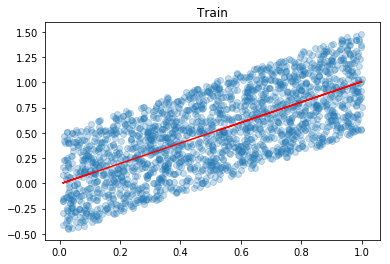

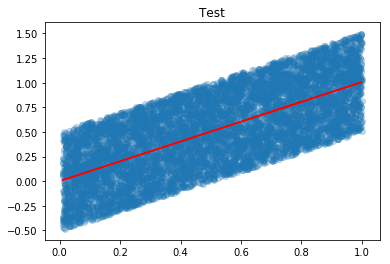

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.8)
print("Train .8: ", mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_))
print("Test .8:  ", mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_))
model.fit(x_train, y_train)
model.coef_, model.intercept_
plt.scatter(x_train,y_train, alpha=.25)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c="red")
plt.title("Train")
plt.show()

model.fit(x_test, y_test)
model.coef_, model.intercept_
plt.scatter(x_test,y_test, alpha=.25)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c="red")
plt.title("Test")
plt.show()

Train .9:  0.08202451807628497
Test .9:   0.0821382929795757


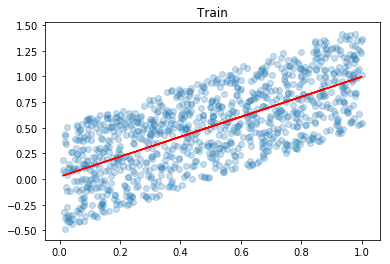

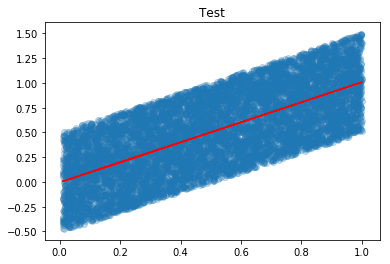

In [192]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.9)
print("Train .9: ", mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_))
print("Test .9:  ", mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_))
model.fit(x_train, y_train)
model.coef_, model.intercept_
plt.scatter(x_train,y_train, alpha=.25)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c="red")
plt.title("Train")
plt.show()

model.fit(x_test, y_test)
model.coef_, model.intercept_
plt.scatter(x_test,y_test, alpha=.25)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c="red")
plt.title("Test")
plt.show()

Train .99:  0.0847431051813759
Test .99:   0.08209974175955818


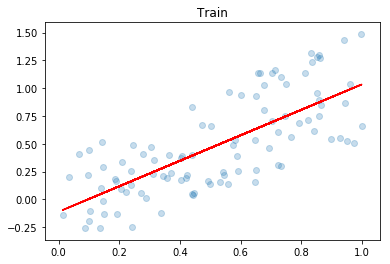

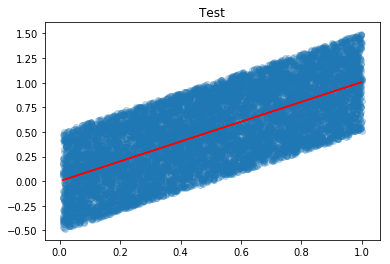

In [193]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.99)
print("Train .99: ", mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_))
print("Test .99:  ", mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_))
model.fit(x_train, y_train)
model.coef_, model.intercept_
plt.scatter(x_train,y_train, alpha=.25)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c="red")
plt.title("Train")
plt.show()

model.fit(x_test, y_test)
model.coef_, model.intercept_
plt.scatter(x_test,y_test, alpha=.25)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c="red")
plt.title("Test")
plt.show()

Train .5:  0.08200824756069676
Test .5:   0.0983235828240094


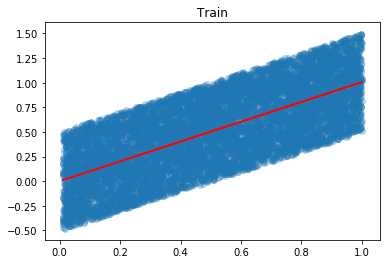

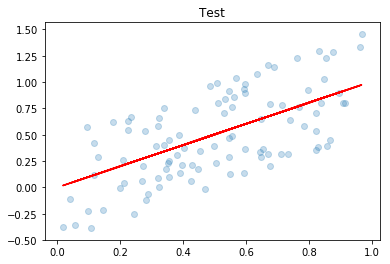

In [234]:
# Plotting only three ridge because I think they will look
# the same

ridge = Ridge()
ridge.fit(x_train, y_train)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.01)
print("Train .5: ", mean_squared_error(y_train, np.dot(x_train, ridge.coef_) + ridge.intercept_))
print("Test .5:  ", mean_squared_error(y_test, np.dot(x_test, ridge.coef_) + ridge.intercept_))
ridge.fit(x_train, y_train)
ridge.coef_, ridge.intercept_

plt.scatter(x_train,y_train, alpha=.25)
plt.plot(x_train, np.dot(x_train, ridge.coef_) + ridge.intercept_, c="red")
plt.title("Train")
plt.show()

model.fit(x_test, y_test)
model.coef_, ridge.intercept_
plt.scatter(x_test,y_test, alpha=.25)
plt.plot(x_test, np.dot(x_test, ridge.coef_) + ridge.intercept_, c="red")
plt.title("Test")
plt.show()

In [232]:
# The graph may look the same as the linear model, but
# error on the test is more variable than other models






Train .5:  0.08255202679572644
Test .5:   0.0816969471911172


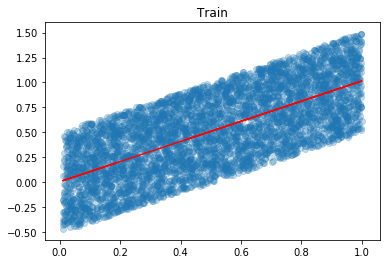

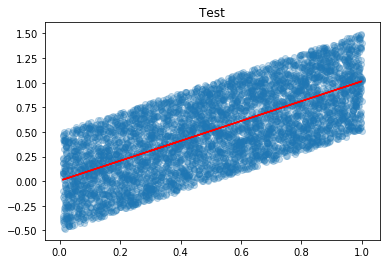

In [233]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)
print("Train .5: ", mean_squared_error(y_train, np.dot(x_train, ridge.coef_) + ridge.intercept_))
print("Test .5:  ", mean_squared_error(y_test, np.dot(x_test, ridge.coef_) + ridge.intercept_))
ridge.fit(x_train, y_train)
ridge.coef_, ridge.intercept_

plt.scatter(x_train,y_train, alpha=.25)
plt.plot(x_train, np.dot(x_train, ridge.coef_) + ridge.intercept_, c="red")
plt.title("Train")
plt.show()

model.fit(x_test, y_test)
model.coef_, ridge.intercept_
plt.scatter(x_test,y_test, alpha=.25)
plt.plot(x_test, np.dot(x_test, ridge.coef_) + ridge.intercept_, c="red")
plt.title("Test")
plt.show()

Train .75:  0.08250547192050113
Test .75:   0.0819972339079879


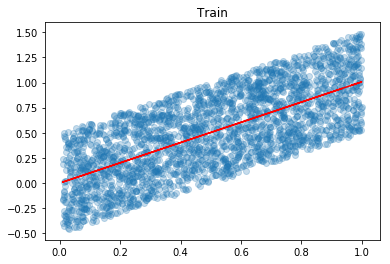

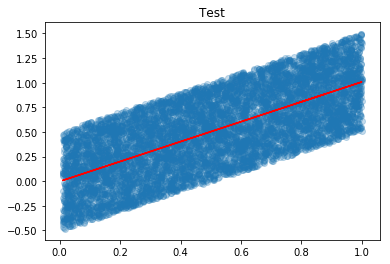

In [205]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.75)
print("Train .75: ", mean_squared_error(y_train, np.dot(x_train, ridge.coef_) + ridge.intercept_))
print("Test .75:  ", mean_squared_error(y_test, np.dot(x_test, ridge.coef_) + ridge.intercept_))
ridge.fit(x_train, y_train)
ridge.coef_, ridge.intercept_

plt.scatter(x_train,y_train, alpha=.25)
plt.plot(x_train, np.dot(x_train, ridge.coef_) + ridge.intercept_, c="red")
plt.title("Train")
plt.show()

model.fit(x_test, y_test)
model.coef_, ridge.intercept_
plt.scatter(x_test,y_test, alpha=.25)
plt.plot(x_test, np.dot(x_test, ridge.coef_) + ridge.intercept_, c="red")
plt.title("Test")
plt.show()

## 4. Chose an ideal split size based on the previous plot for Ridge.
## Vary the Ridge parameter `alpha` from 0 to any value you'd like above 1. Plot the Train and Test error. Describe what you see based on the `alpha` parameter's stiffness.

Train .5:  0.1530001023109714
Test .5:   0.1408133703652748


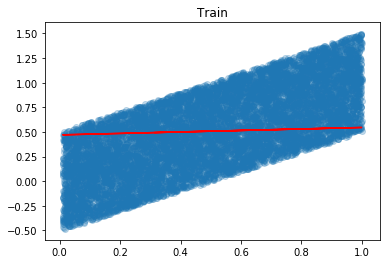

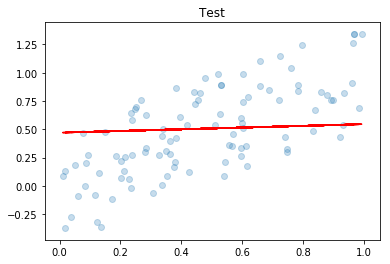

In [236]:
# I'm doing .01 just because the lower test error value is
# more prominant and variable than other ones

from sklearn import linear_model

ridge = linear_model.Ridge(alpha=10000) # Super stiff
ridge.fit(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.01)
print("Train .5: ", mean_squared_error(y_train, np.dot(x_train, ridge.coef_) + ridge.intercept_))
print("Test .5:  ", mean_squared_error(y_test, np.dot(x_test, ridge.coef_) + ridge.intercept_))
ridge.fit(x_train, y_train)
ridge.coef_, ridge.intercept_

plt.scatter(x_train,y_train, alpha=.25)
plt.plot(x_train, np.dot(x_train, ridge.coef_) + ridge.intercept_, c="red")
plt.title("Train")
plt.show()

model.fit(x_test, y_test)
model.coef_, ridge.intercept_
plt.scatter(x_test,y_test, alpha=.25)
plt.plot(x_test, np.dot(x_test, ridge.coef_) + ridge.intercept_, c="red")
plt.title("Test")
plt.show()



In [ ]:
# Well, that's interesting. the error value is much higher
# of course.

Train .5:  0.09701457510508828
Test .5:   0.09245337961715959


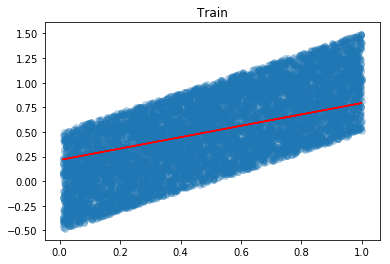

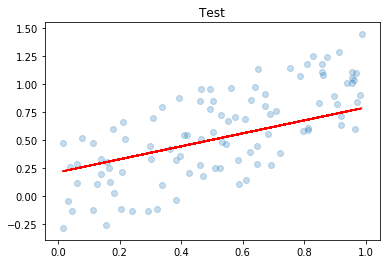

In [241]:
ridge = linear_model.Ridge(alpha=600)
ridge.fit(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.01)
print("Train .5: ", mean_squared_error(y_train, np.dot(x_train, ridge.coef_) + ridge.intercept_))
print("Test .5:  ", mean_squared_error(y_test, np.dot(x_test, ridge.coef_) + ridge.intercept_))
ridge.fit(x_train, y_train)
ridge.coef_, ridge.intercept_

plt.scatter(x_train,y_train, alpha=.25)
plt.plot(x_train, np.dot(x_train, ridge.coef_) + ridge.intercept_, c="red")
plt.title("Train")
plt.show()

model.fit(x_test, y_test)
model.coef_, ridge.intercept_
plt.scatter(x_test,y_test, alpha=.25)
plt.plot(x_test, np.dot(x_test, ridge.coef_) + ridge.intercept_, c="red")
plt.title("Test")
plt.show()



Train .5:  0.08211377163668986
Test .5:   0.08315423545340801


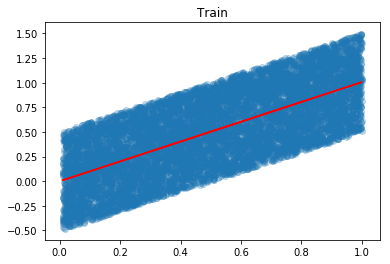

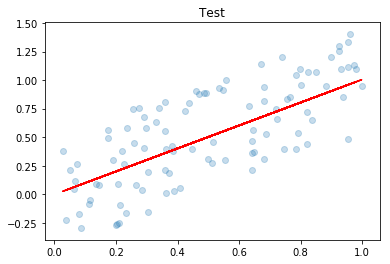

In [242]:
ridge = linear_model.Ridge(alpha=0) 
ridge.fit(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.01)
print("Train .5: ", mean_squared_error(y_train, np.dot(x_train, ridge.coef_) + ridge.intercept_))
print("Test .5:  ", mean_squared_error(y_test, np.dot(x_test, ridge.coef_) + ridge.intercept_))
ridge.fit(x_train, y_train)
ridge.coef_, ridge.intercept_

plt.scatter(x_train,y_train, alpha=.25)
plt.plot(x_train, np.dot(x_train, ridge.coef_) + ridge.intercept_, c="red")
plt.title("Train")
plt.show()

model.fit(x_test, y_test)
model.coef_, ridge.intercept_
plt.scatter(x_test,y_test, alpha=.25)
plt.plot(x_test, np.dot(x_test, ridge.coef_) + ridge.intercept_, c="red")
plt.title("Test")
plt.show()



## Bonus. Either: Generate data  with a polynomial shape or use real data that you find on your own. Choose whatever regression model and process you'd like (Ridge, polynomial, etc.) and plot the Train-Test errors vs. any parameter your Model depends on (e.g. `alpha`, `degree`, etc.)